# Insights into Boston Housing: An Analytical Dive into Value Determinants.ipynb

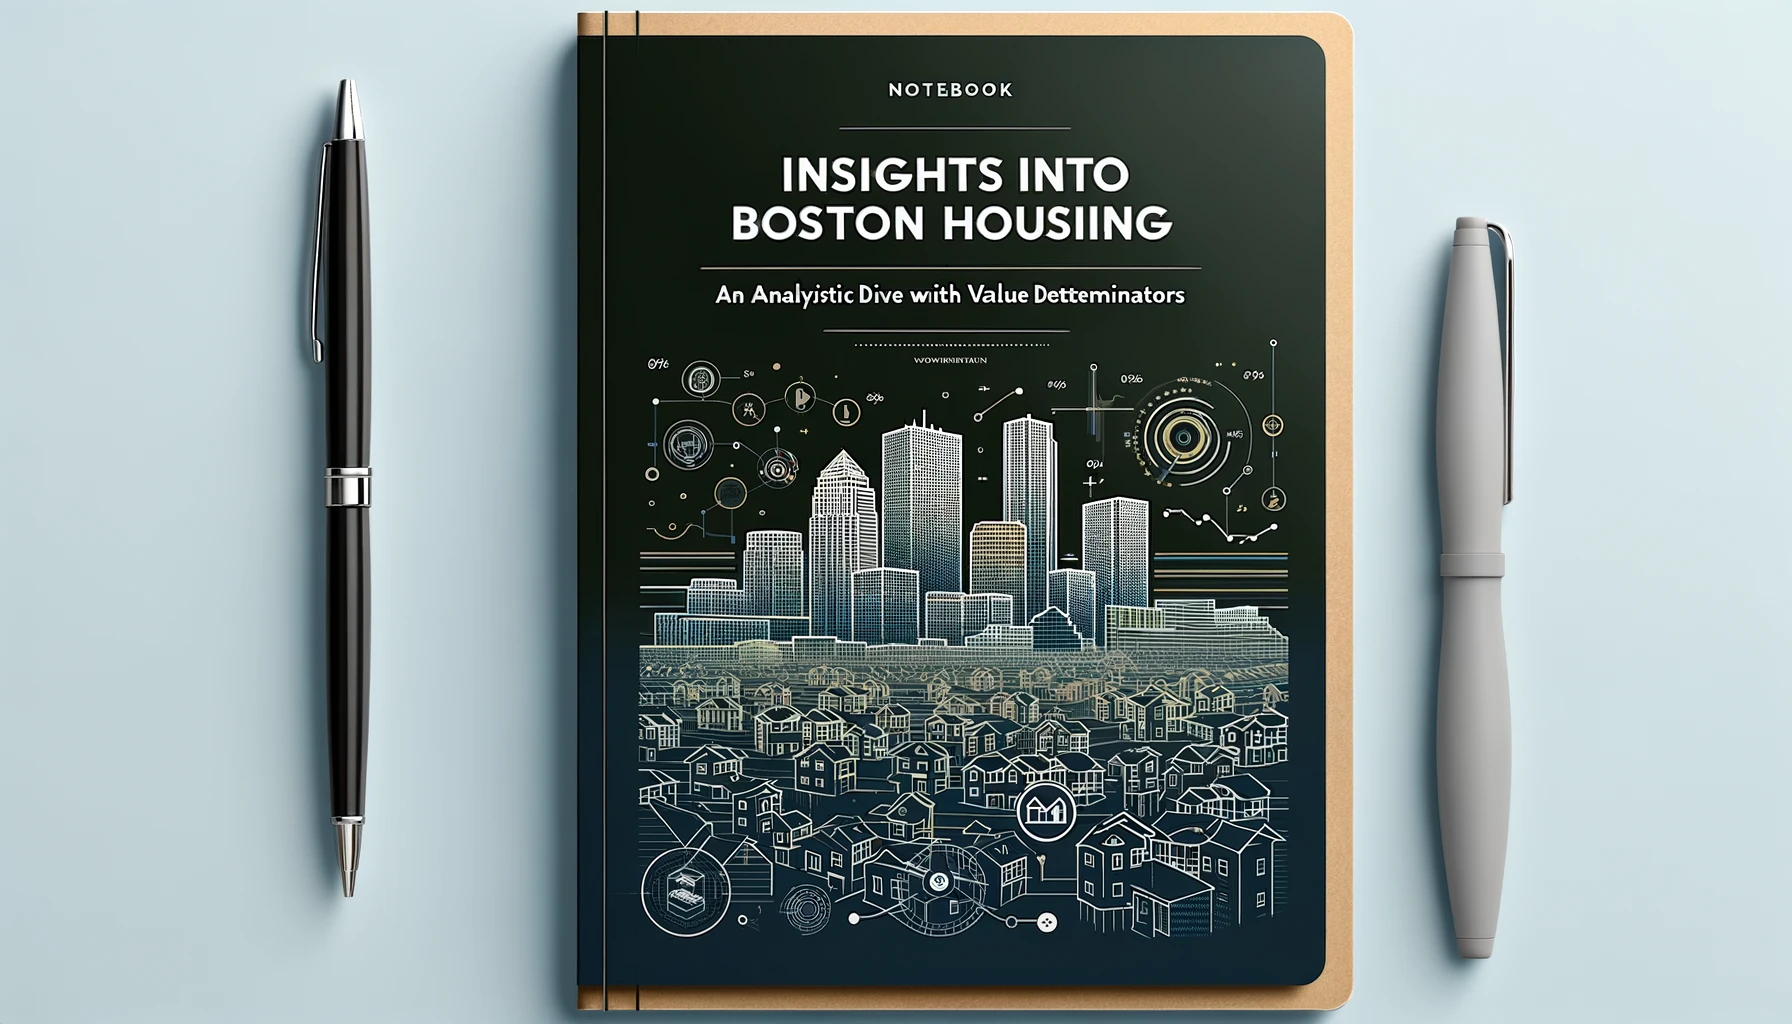

### Project Case Scenario<b>
Project Scenari </b>: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on h ousing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

### Overview of Project Tasks
Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: Generate basic statistics and visualizations for upper management. 

Task 3: Use the appropriate tests to answer the questions provided.

Task 4: Share your Jupyter Notebook.

 This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.

### Become familiar with the dataset

The following describes the dataset variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax ratehom in $1000's


- **PTRATIO** - pupil-teacher ratio by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


importing dataset:

In [2]:
URL=r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv' 
Boston_df=pd.read_csv(URL)

In [3]:
Boston_df.head() 

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
Boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
Boston_df.drop('Unnamed: 0',axis=1,inplace=True)
Boston_df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
Boston_df.shape 

(506, 13)

In [7]:
Boston_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
Boston_df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
Boston_df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the default figure size
plt.rcParams['figure.figsize'] = [10, 6]

### Distribution of Median Value of Owner-Occupied Homes:

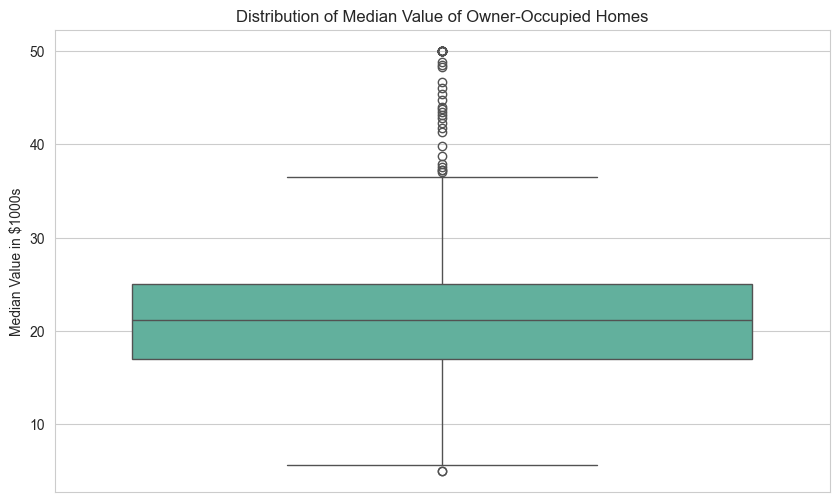

In [20]:
# Boxplot for the "Median value of owner-occupied homes"
plt.figure()
sns.boxplot(y=Boston_df['MEDV'],color='#55bda4')
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value in $1000s')
plt.show()

The boxplot shows a wide range in the median values of owner-occupied homes in Boston, with several outliers on the higher end. This suggests that while most of the homes are within a more modest range of values, there are a few homes that are significantly more expensive than the rest.

### Distribution of Properties by Charles River Proximity:

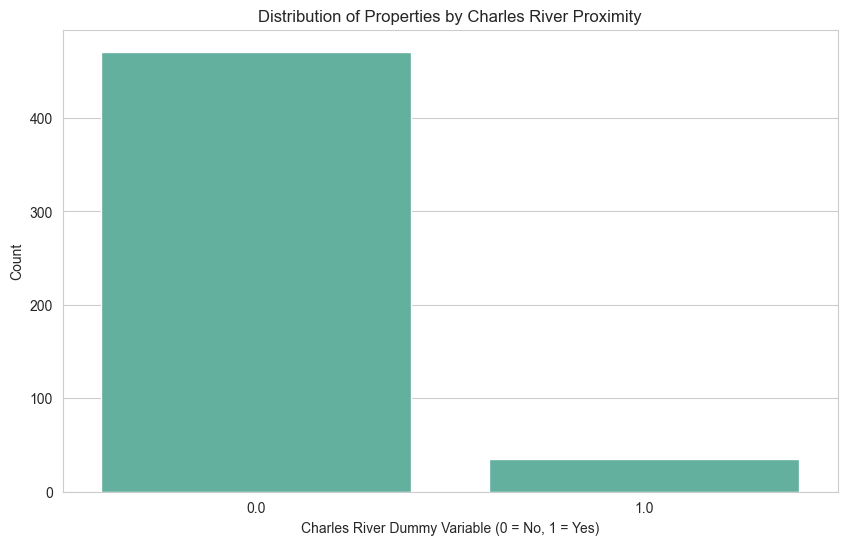

In [23]:
# Bar plot for the Charles river variable
plt.figure()
sns.countplot(x=Boston_df['CHAS'],color='#55bda4')
plt.title('Distribution of Properties by Charles River Proximity')
plt.xlabel('Charles River Dummy Variable (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The bar plot demonstrates that properties not adjacent to the Charles River are more common than those that are. This insight could influence decisions related to property development or conservation efforts near the river.

### Median Value of Homes vs. Age of Home: 

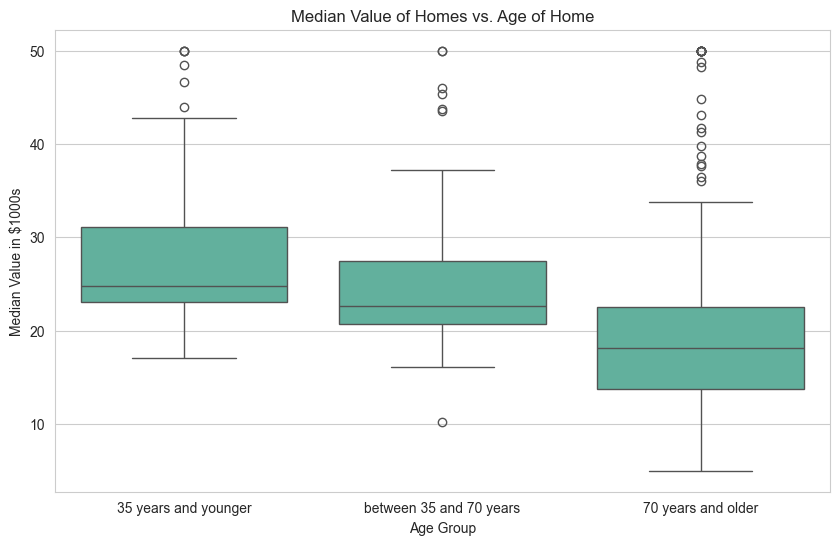

In [26]:
# Boxplot for the MEDV variable vs the AGE variable (discretized)
Boston_df['AGE_GROUP'] = pd.cut(Boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.figure()
sns.boxplot(x='AGE_GROUP', y='MEDV', data=Boston_df,color='#55bda4')
plt.title('Median Value of Homes vs. Age of Home')
plt.xlabel('Age Group')
plt.ylabel('Median Value in $1000s')
plt.show()

Discretizing the age into three groups and comparing it against the median value of homes shows that younger homes (35 years and younger) tend to have higher median values compared to older homes. There is a noticeable decline in median home values as the age category increases, indicating that newer homes are generally more expensive.

### Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres: 

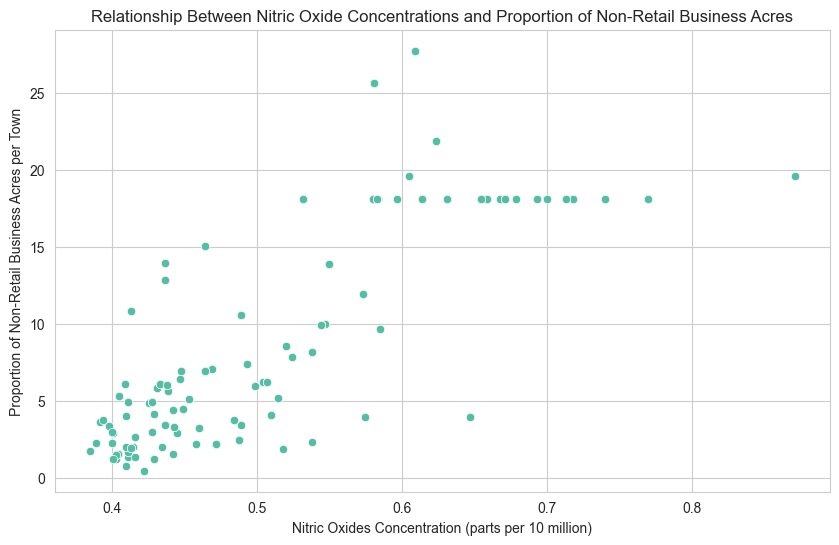

In [30]:
# Scatter plot for NOX vs. INDUS
plt.figure()
sns.scatterplot(x='NOX', y='INDUS', data=Boston_df,color='#55bda4')
plt.title('Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

The scatter plot shows a positive relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. This suggests that areas with higher proportions of non-retail business land tend to have higher levels of nitric oxide, possibly indicating higher levels of pollution associated with industrial or commercial areas.

### Distribution of Pupil-Teacher Ratio: 

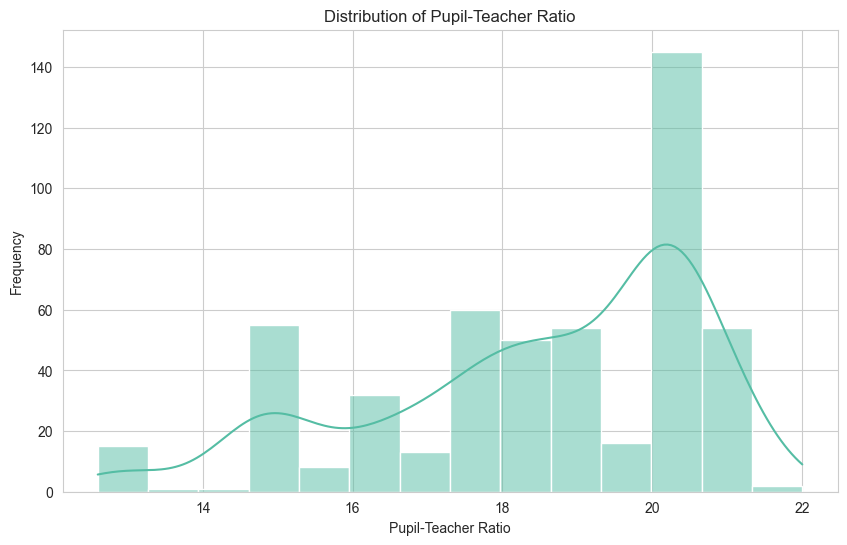

In [31]:
# Histogram for the pupil to teacher ratio variable
plt.figure()
sns.histplot(Boston_df['PTRATIO'], kde=True,color='#55bda4')
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

The histogram for the pupil-teacher ratio shows that most towns have a ratio between approximately 14 and 21, with the distribution slightly skewed to the right. This indicates variability in the pupil-teacher ratio across different towns, with a concentration of towns having higher ratios.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for Independent Samples) 

<b>Hypothesis:</b>

<b>
Null hypothesis (H0</b>): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles riv

<b>.
Alternative hypothesis (H</b>1): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.

In [32]:
from scipy.stats import ttest_ind

# Subset the data into two groups: bounded by Charles river and not bounded
group1 = Boston_df[Boston_df['CHAS'] == 1]['MEDV']
group2 = Boston_df[Boston_df['CHAS'] == 0]['MEDV']

# Perform T-test for independent samples
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


Given the p-value (0.000074) is less than our significance level (α = 0.05), we reject the null hypothesis. This means there is a statistically significant difference in the median values of houses bounded by the Charles River compared to those not bounded by the Charles River.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA) 

**Hypothesis:**

<b>
Null hypothesis (H0</b>): There is no difference in median values of houses across the different age categorie

**.
Alternative hypothesis (H**1): At least one age category differs in terms of median house values.

In [33]:
from scipy.stats import f_oneway

# Subsetting the data into three groups based on AGE
age_group1 = Boston_df[Boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
age_group2 = Boston_df[Boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
age_group3 = Boston_df[Boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Perform ANOVA
f_stat, p_value_anova = f_oneway(age_group1, age_group2, age_group3)

print(f"F-statistic: {f_stat}, P-value: {p_value_anova}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


The p-value (1.71e-15) is significantly less than our significance level (α = 0.05), leading us to reject the null hypothesis. This indicates that there is a statistically significant difference in the median values of houses across the different age groups.

### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative hypothesis (H1): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

In [34]:
from scipy.stats import pearsonr

# Calculate Pearson Correlation Coefficient
corr_coefficient, p_value_corr = pearsonr(Boston_df['NOX'], Boston_df['INDUS'])

print(f"Correlation Coefficient: {corr_coefficient}, P-value: {p_value_corr}")


Correlation Coefficient: 0.7636514469209155, P-value: 7.913361061237816e-98


The correlation coefficient of 0.764 suggests a strong positive relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. Given the p-value (7.91e-98) is significantly less than our significance level (α = 0.05), we reject the null hypothesis. This indicates that there is a statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression Analysis)

Hypothesis:

Null hypothesis (H0): There is no impact of the weighted distance to the five Boston employment centres on the median value of owner-occupied home

.
Alternative hypothesis (H1): There is an impact of the weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

In [ ]:
#!pip install statsmodels

In [41]:
import statsmodels.api as sm

# Prepare the independent (X) and dependent (y) variables
X = sm.add_constant(Boston_df['DIS'])  # Add a constant term to the predictor
y = Boston_df['MEDV']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        21:38:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis confirms a statistically significant positive impact of the weighted distance to the five Boston employment centres on the median value of owner-occupied homes. However, given the R-squared value is relatively low, the distance to employment centres explains only a small portion of the variation in home values, suggesting other factors also play critical roles in determining home values in Boston

*<font color='blue'>Masoud Fattahi Bandpey</font>*